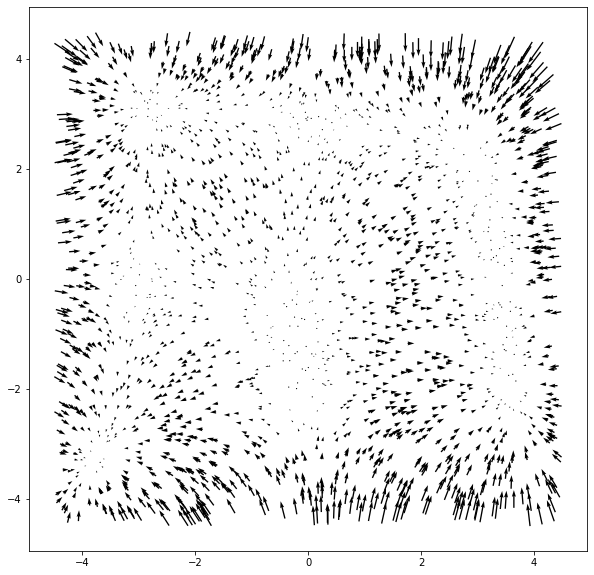

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import math

data_x0 = np.loadtxt('./nonlinear_vectorfield_data_x0.txt')
data_x1 = np.loadtxt('./nonlinear_vectorfield_data_x1.txt')
x0x, x0y = data_x0.T
x1x, x1y = data_x1.T
xd = x1x-x0x
yd = x1y-x0y
fig = plt.figure(figsize=(10,10))

plt.quiver(x0x, x0y, xd, yd)
plt.show()

## Part one: As in the previous task, try to estimate the vector field describing ψ with a linear operator A 

In [2]:
def least_squares(x, y):
    a = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(a, y, rcond=None)[0]


def approximate(x0x, x0y, xd, yd):

    mx, cx = least_squares(x0x, xd)
    my, cy = least_squares(x0y, yd)

    fx = np.polyval([mx, cx], x0x)
    fy = np.polyval([my, cy], x0y)

    return mx, my, cx, cy, fx, fy

def evaluate(mx, my, x0x, x0y, t=1):
    
    ev_x = np.polyval([mx, cx], x0x)*t
    ep_x = ev_x + x0x

    ev_y = np.polyval([my, cy], x0y)*t
    ep_y = ev_y + x0y
    
    return ep_x, ep_y

def mse(x0x, x0y, mx, my, cx, cy, t=1):

    ep_x, ep_y = evaluate(mx, my, x0x, x0y, t)

    return np.mean(np.sqrt(np.square(ep_x - x1x) + np.square(ep_y - x1y))) 

In [3]:
mx, my, cx, cy, fx, fy = approximate(x0x, x0y, xd, yd)
print(mse(x0x, x0y, mx, my, cx, cy))

0.17494129240216688


Text(0.5, 1.0, 'Approximating vecter field')

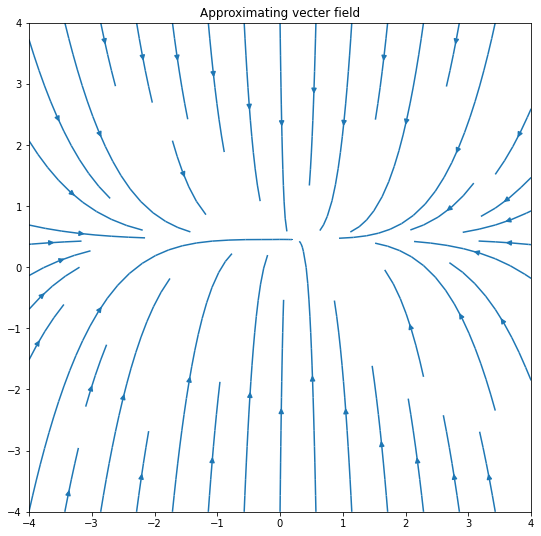

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 4
alpha = 0.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = mx*X + cx
V = my*Y + cy
speed = np.sqrt(U**2 + V**2)


#gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
fig = plt.figure(figsize=(9, 9))
plt.streamplot(X, Y, U, V, density=[0.5, 1])
plt.title('Approximating vecter field')

## Part two: Now, try to approximate the vector field using radial basis functions 

In [30]:
def rbf(x, xl, epsilon, plot=True):
    r = np.exp(-(x-xl)**2 / (epsilon**2))
    if plot:
        plt.plot(x, r, '.')
    return r

def plot_radials(x, coef, l=10, epsilon=1, plot=False):

    points = []

    final = np.zeros_like(x)

    for i in range(l):
        points.append(np.min(x) + (i*(np.max(x)-np.min(x))/l))

    for i in range(l):
        xl = np.ones(len(x))*points[i]
            
        r = np.exp(-(x-xl)**2 / (epsilon**2))*coef[i]
        final = final + r
        if(plot):
            plt.plot(x, r, '.')
        
    return final/l

def least_squares_radial(x, y, l=10, epsilon=1, plot=True):

    if plot:
        fig = plt.figure(figsize=(12,12))
    
    points = []
    results = []
    
    for i in range(l):
        points.append(np.min(x) + (i*(np.max(x)-np.min(x))/l))
                          
    for i in range(l):
        xl = np.ones(len(x))*points[i]
        if plot:
            results.append(rbf(x, xl, epsilon))
        else:
            results.append(rbf(x, xl, epsilon, plot=False))
        
    results = np.array(results)
            
    if plot:
        plt.show()
        
    c = np.vstack([results, np.ones(results.shape)]).T
    
    return np.linalg.lstsq(c, y, rcond=None)[0]

def approximate_radial(x0x, x0y, xd, yd, l=10, epsilon=1, plot=False):

    coef_x = least_squares_radial(x0x, xd, epsilon=epsilon, l=l, plot=plot)
    coef_y = least_squares_radial(x0y, yd, epsilon=epsilon, l=l, plot=plot)
    
    if plot:
        fig = plt.figure(figsize=(12,12))
        
    fx = plot_radials(x0x, coef_x, l=l, plot=plot)
    plt.plot(x0x, xd, '.k')
    
    if plot:
        fig = plt.figure(figsize=(12,12))
        
    fy = plot_radials(x0y, coef_y, l=l, plot=plot)
    plt.plot(x0y, yd, '.k')
    
    if plot:
        fig = plt.figure(figsize=(12,12))
    
    plt.plot(x0x, fx, '.r')
    plt.plot(x0x, xd, '.g')
    
    if plot:
        fig = plt.figure(figsize=(12,12))
    
        plt.plot(x0y, fy, '.r')
        plt.plot(x0y, yd, '.g')

    return fx, fy

def evaluate_radial(x0x, x0y, fx, fy, t=1, plot=True):
    
    ev_x = fx*t
    ep_x = ev_x + x0x

    ev_y = fy*t
    ep_y = ev_y + x0y
    
    return ep_x, ep_y

def mse_radial(x0x, x0y, fx, fy, t=1, plot=True):

    ep_x, ep_y = evaluate_radial(x0x, x0y, fx, fy, t=t)
    
    if plot:
        
        fig = plt.figure(figsize=(12,12))
        
        plt.plot(ep_x, '.r')
        plt.plot(x1x, '.g')
        plt.show()

        fig = plt.figure(figsize=(12,12))

        plt.plot(ep_y, '.r')
        plt.plot(x1y, '.g')
        plt.show()

    return np.mean(np.sqrt(np.square(ep_x - x1x) + np.square(ep_y - x1y))) 

0.16024513562088236


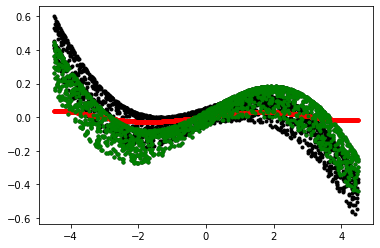

In [27]:
fx, fy = approximate_radial(x0x, x0y, xd, yd, epsilon=0.1, l=20, plot=False)
print(mse_radial(x0x, x0y, fx, fy, plot=False))

Text(0.5, 1.0, 'Approximating vecter field')

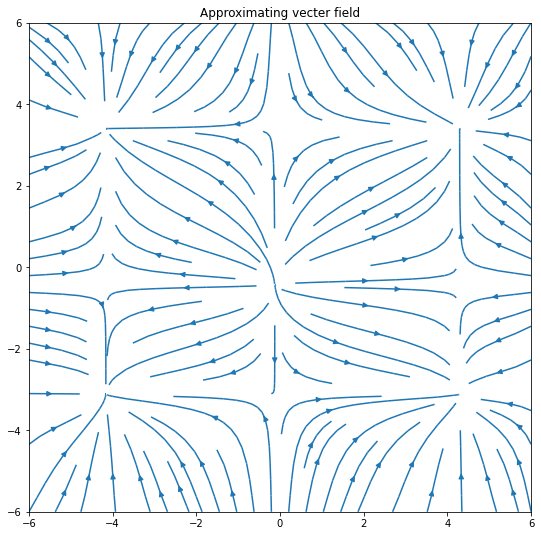

In [29]:
w = 6
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
coef_x = least_squares_radial(x0x, xd, epsilon=0.1, l=20, plot=False)
coef_y = least_squares_radial(x0y, yd, epsilon=0.1, l=20, plot=False)
U = plot_radials(X, coef_x, l=20, plot=False)
V = plot_radials(Y, coef_y, l=20, plot=False)
speed = np.sqrt(U**2 + V**2)
#  Varying density along a streamline
fig = plt.figure(figsize=(9, 9))
plt.streamplot(X, Y, U, V)
plt.title('Approximating vecter field')


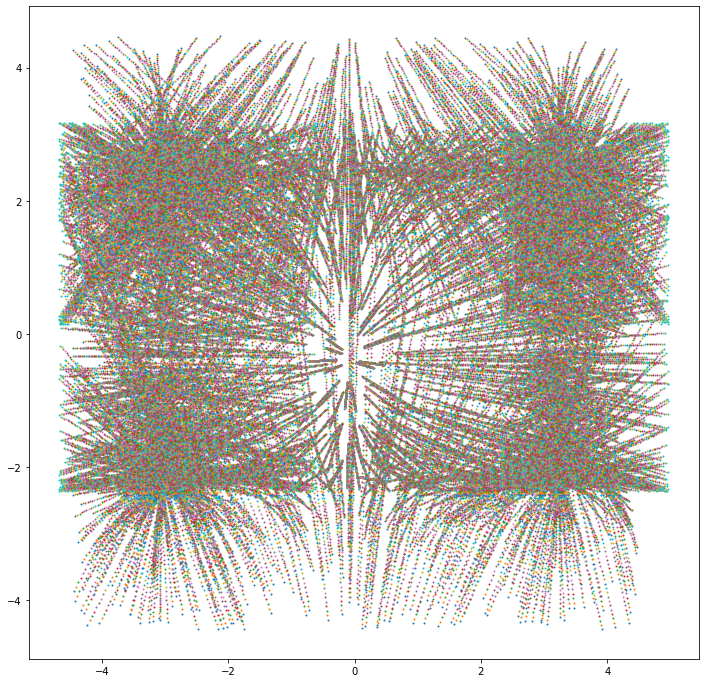

In [31]:
tt = np.linspace(1, 100, num=100)

fig = plt.figure(figsize=(12,12))

points_x = []
points_y = []

x0x_new = x0x
x0y_new = x0y
for i in tt:
    
    ep_x, ep_y = evaluate_radial(x0x_new, x0y_new, fx, fy, t=1, plot=False)
    
    x0x_new = ep_x
    x0y_new = ep_y
    plt.scatter(ep_x, ep_y, marker='o', s=1)
plt.show()
